In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(42)

In [3]:
class Model(nn.Module):
    def __init__(self, in_features=4, out_features=3, h1_units=100, h2_units=50, h3_unit=20):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1_units)
        self.fc2 = nn.Linear(h1_units, h2_units)
        self.fc3 = nn.Linear(h2_units, h3_unit)
        self.out = nn.Linear(h3_unit, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

In [4]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_data = pd.read_csv(url)

In [5]:
my_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
my_data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
my_data['variety'] = my_data['variety'].replace('Setosa', 0.0)
my_data['variety'] = my_data['variety'].replace('Versicolor', 1.0)
my_data['variety'] = my_data['variety'].replace('Virginica', 2.0)
print(my_data)

X = my_data.drop('variety', axis=1)
y = my_data['variety']

# convert X and y to numpy array
X = X.values
y = y.values

     sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert X_train, X_test to Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert y_train, y_test = Tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
X_train

tensor([[4.6000, 3.6000, 1.0000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0

In [10]:
model = Model()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
epochs = 250
losses = []
for epoch in range(epochs):
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if epoch % 10 ==0:
        print(f'Epoch: {epoch} amd loss: {loss}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Epoch: 0 amd loss: 1.1208813190460205
Epoch: 10 amd loss: 1.1106122732162476
Epoch: 20 amd loss: 1.100205659866333
Epoch: 30 amd loss: 1.0888785123825073
Epoch: 40 amd loss: 1.0784879922866821
Epoch: 50 amd loss: 1.0684517621994019
Epoch: 60 amd loss: 1.0609418153762817
Epoch: 70 amd loss: 1.056349754333496
Epoch: 80 amd loss: 1.0510166883468628
Epoch: 90 amd loss: 1.044899821281433
Epoch: 100 amd loss: 1.0378015041351318
Epoch: 110 amd loss: 1.0299357175827026
Epoch: 120 amd loss: 1.0230803489685059
Epoch: 130 amd loss: 1.0169007778167725
Epoch: 140 amd loss: 1.0097906589508057
Epoch: 150 amd loss: 1.001136064529419
Epoch: 160 amd loss: 0.9911906719207764
Epoch: 170 amd loss: 0.9811991453170776
Epoch: 180 amd loss: 0.9719356894493103
Epoch: 190 amd loss: 0.9626215696334839
Epoch: 200 amd loss: 0.9528564810752869
Epoch: 210 amd loss: 0.9424505829811096
Epoch: 220 amd loss: 0.9318828582763672
Epoch: 230 amd loss: 0.9214358925819397
Epoch: 240 amd loss: 0.9107798933982849


Text(0.5, 0, 'Epoch')

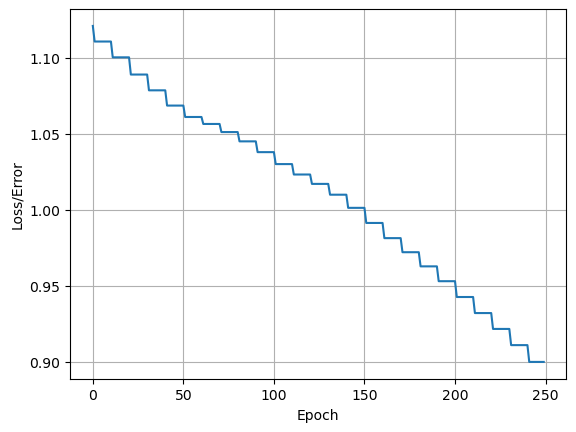

In [13]:
plt.plot(range(epochs), losses)
plt.grid()
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [14]:
with torch.no_grad():
    y_eval= model.forward(X_test)
    loss = criterion(y_eval, y_test)


In [15]:
loss

tensor(0.9123)

In [16]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i]==0:
            x = 'Setosa'
        elif y_test[i]==1:
             x = 'Versicolor'
        else:
             x = 'Virginica'
        
        if y_val.argmax()==0:
            z = 'Setosa'
        elif y_val.argmax()==1:
             z = 'Versicolor'
        else:
             z = 'Virginica'



        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} \t {x} \t {z}')

        if y_val.argmax().item() == y_test[i]:
            correct +=1
    print(f'We got {correct} correct')
        

1.) tensor([-0.1752,  0.2963,  0.0597]) 	 1 	 1 	 Versicolor 	 Versicolor
2.) tensor([ 0.6081, -0.4849,  0.0706]) 	 0 	 0 	 Setosa 	 Setosa
3.) tensor([-0.2087,  0.4151,  0.1189]) 	 2 	 1 	 Virginica 	 Versicolor
4.) tensor([-0.1641,  0.2798,  0.0542]) 	 1 	 1 	 Versicolor 	 Versicolor
5.) tensor([-0.1724,  0.2988,  0.0429]) 	 1 	 1 	 Versicolor 	 Versicolor
6.) tensor([ 0.5595, -0.4438,  0.0746]) 	 0 	 0 	 Setosa 	 Setosa
7.) tensor([-0.0275,  0.1219,  0.0308]) 	 1 	 1 	 Versicolor 	 Versicolor
8.) tensor([-0.1776,  0.3239,  0.0800]) 	 2 	 1 	 Virginica 	 Versicolor
9.) tensor([-0.1693,  0.3007,  0.0797]) 	 1 	 1 	 Versicolor 	 Versicolor
10.) tensor([-0.0970,  0.1937,  0.0272]) 	 1 	 1 	 Versicolor 	 Versicolor
11.) tensor([-0.1766,  0.3211,  0.0835]) 	 2 	 1 	 Virginica 	 Versicolor
12.) tensor([ 0.5126, -0.4042,  0.0786]) 	 0 	 0 	 Setosa 	 Setosa
13.) tensor([ 0.6355, -0.5071,  0.0804]) 	 0 	 0 	 Setosa 	 Setosa
14.) tensor([ 0.5139, -0.4037,  0.0762]) 	 0 	 0 	 Setosa 	 Setosa
15

In [17]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [18]:
with torch.no_grad():
    y = model(new_iris)
    print (y)

tensor([ 0.5470, -0.4372,  0.0821])


In [19]:
def new_data_testing(new_data):
    new = model(new_data)
    
    if new.argmax()==0:
        z = 'Setosa'
    elif new.argmax()==1:
        z = 'Versicolor'
    else:
        z = 'Virginica'
    print(z)


In [20]:
new_data_testing(new_iris)

Setosa


In [21]:
# Save our model
torch.save(model.state_dict(), 'IRIS_Model_Pytorch.pt')

In [22]:
# Load our model
new_model = Model()
new_model.load_state_dict(torch.load('IRIS_Model_Pytorch.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=3, bias=True)
)